In [1]:
import pandas as pd
from sklearn.datasets import load_iris


In [2]:
iris =load_iris()

In [4]:
X= pd.DataFrame(iris.data, columns=iris.feature_names)
y=pd.Series(iris.target,name='target')


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt_model = DecisionTreeClassifier()

In [11]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred_lr = lr_model.predict(X_test)

y_pred_dt = dt_model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [25]:
# Logistic Regression Evaluation
print("Logistic Regression Performance:")
print(f" Accuracy Score : {accuracy_score(y_test,y_pred_lr):.2f}")
print(f" Precision Score : {precision_score(y_test,y_pred_lr,average='weighted'):.2f}")
print(f" Recall Score : {recall_score(y_test,y_pred_lr,average='weighted'):.2f}")
print(f" f1 Score : {f1_score(y_test,y_pred_lr,average='weighted'):.2f}")
print(f" Classification Report : {classification_report(y_test,y_pred_lr)}")

Logistic Regression Performance:
 Accuracy Score : 1.00
 Precision Score : 1.00
 Recall Score : 1.00
 f1 Score : 1.00
 Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [26]:
# Decision Tree Evaluation
print("Decision Tree Evaluation:")
print(f" Accuracy Score : {accuracy_score(y_test,y_pred_dt):.2f}")
print(f" Precision Score : {precision_score(y_test,y_pred_dt,average='weighted'):.2f}")
print(f" Recall Score : {recall_score(y_test,y_pred_dt,average='weighted'):.2f}")
print(f" f1 Score : {f1_score(y_test,y_pred_dt,average='weighted'):.2f}")
print(f" Classification Report : {classification_report(y_test,y_pred_dt)}")

Decision Tree Evaluation:
 Accuracy Score : 1.00
 Precision Score : 1.00
 Recall Score : 1.00
 f1 Score : 1.00
 Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

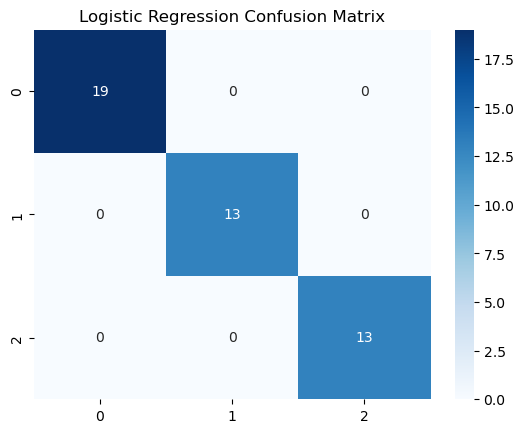

In [34]:
# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

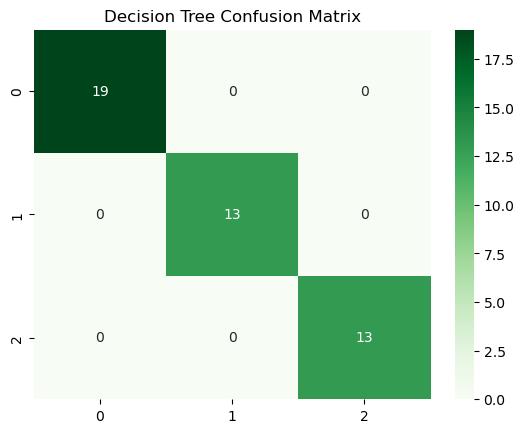

In [36]:
# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_lr,annot=True,fmt='d',cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [3,5,7],
    'min_samples_split':[2,5,10]
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters for Decision Tree: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
Best cross-validation accuracy: 0.94
